# Estat√≠stica descritiva - Avalia√ß√£o Completa

Neste notebook, iremos carregar os dados, realizar an√°lise estat√≠stica e gera√ß√£o dos principais gr√°ficos de avalia√ß√£o.

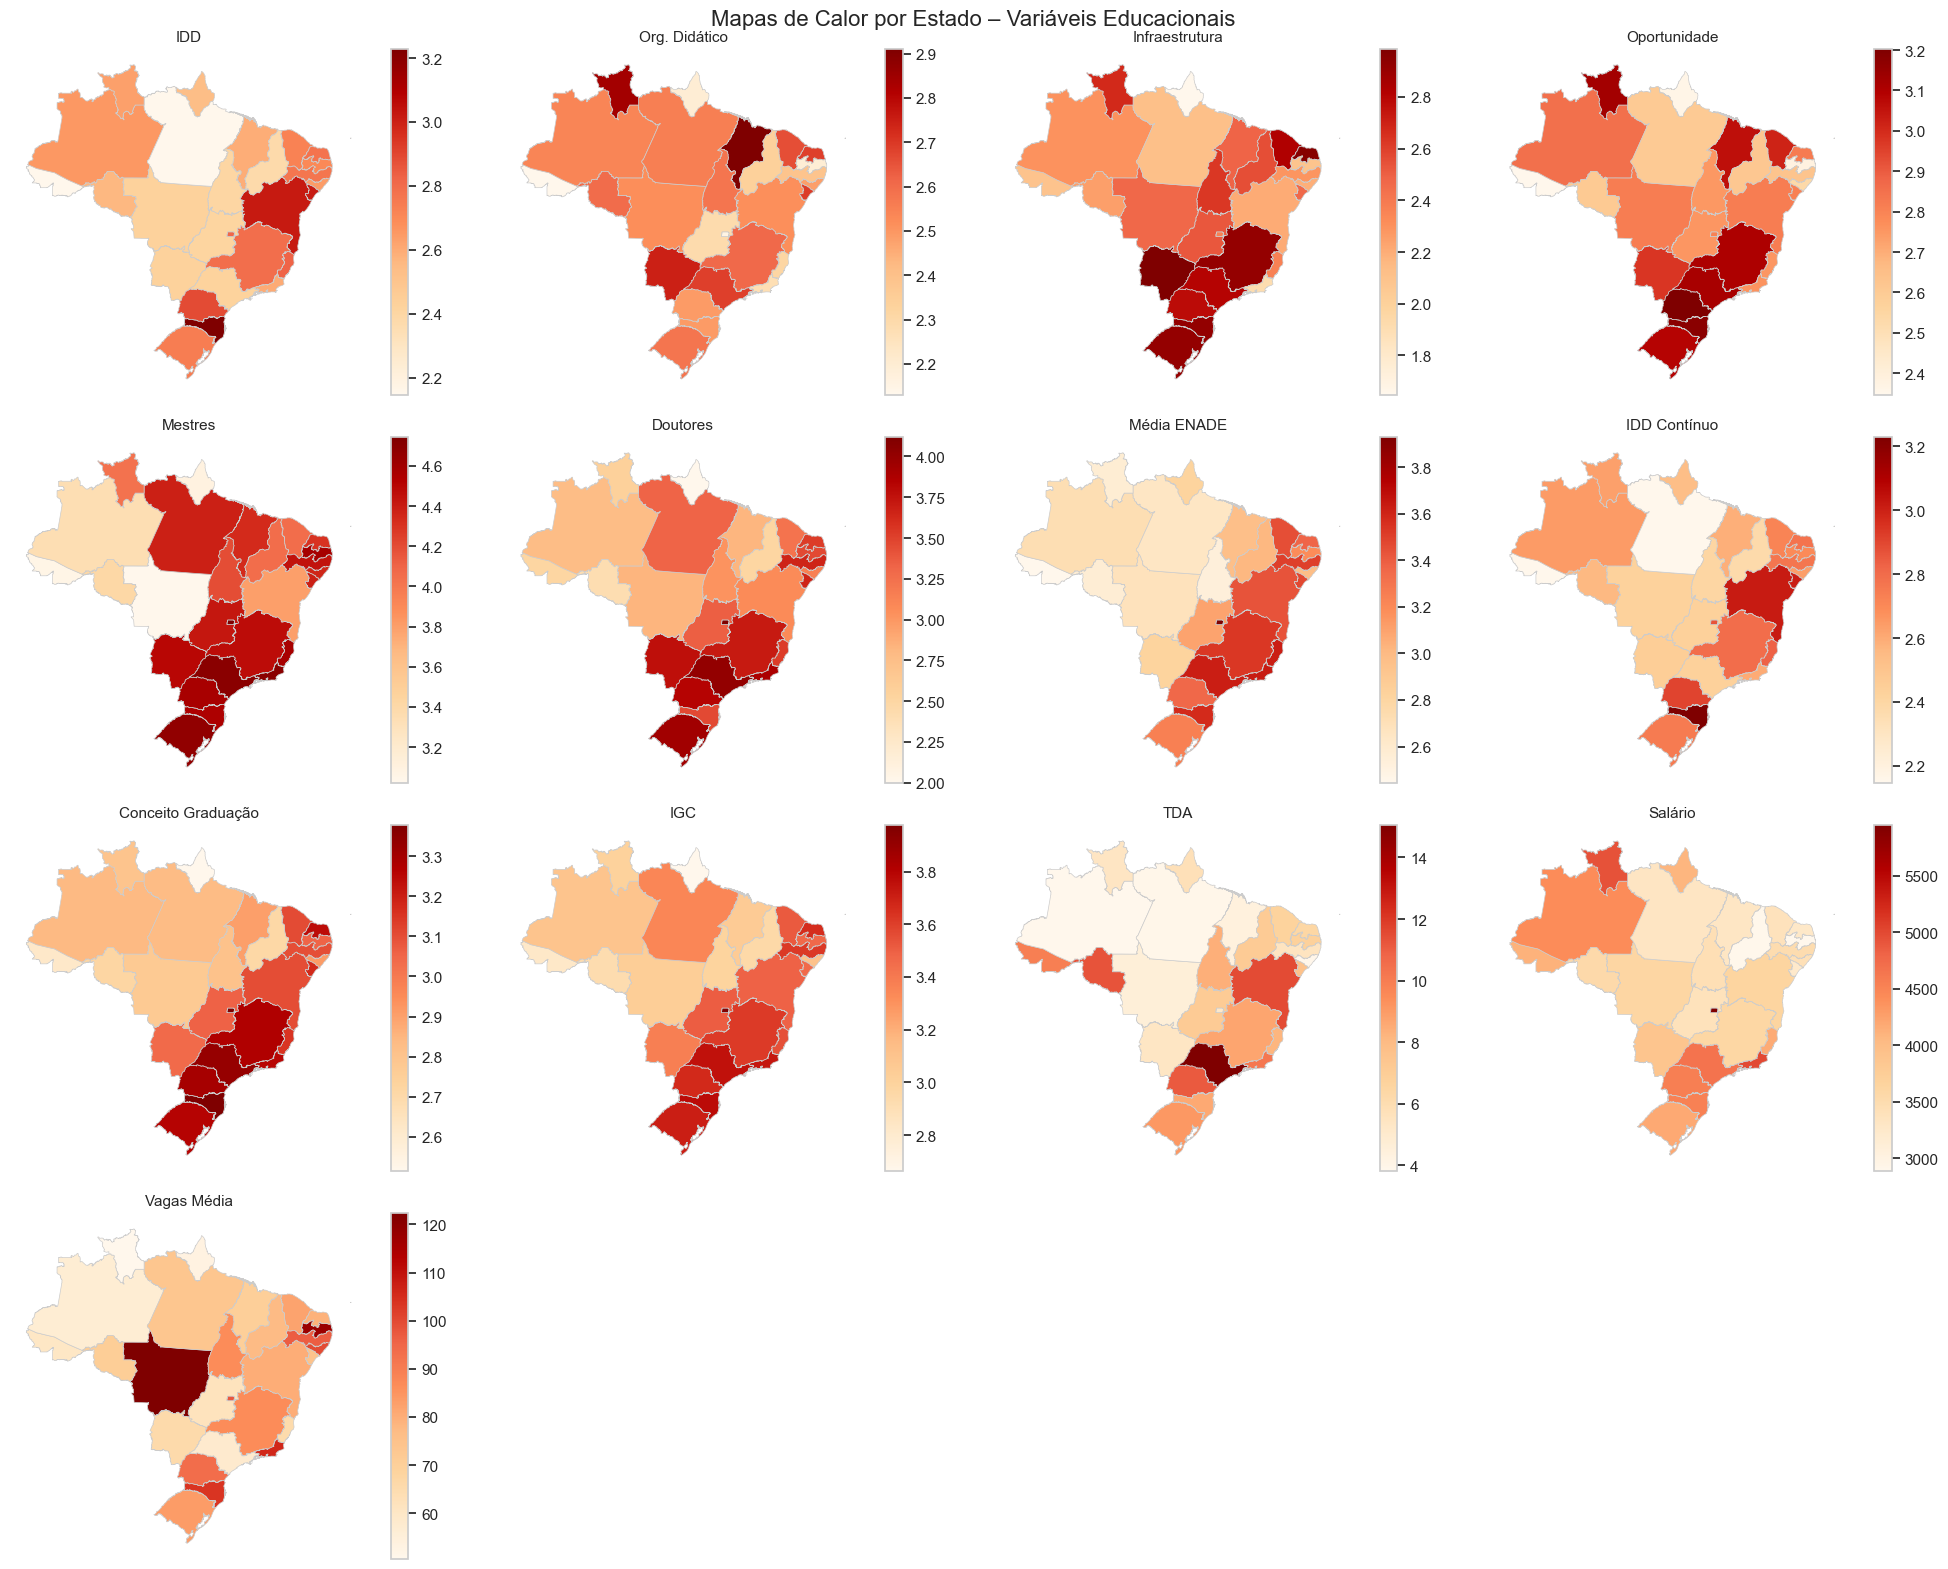

In [21]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt

# üìÅ Caminho do shapefile local
caminho_geo = r'C:\Users\john-\OneDrive - Universidade Federal da Para√≠ba\√Årea de Trabalho\Artigo - Estat√≠stica\projeto-evasao\data\processed\brazil_states.geojson'
gdf_brasil = gpd.read_file(caminho_geo)

# üìç Mapeia nomes dos estados para siglas (UF)
siglas_estados = {
    'Acre': 'AC', 'Alagoas': 'AL', 'Amap√°': 'AP', 'Amazonas': 'AM', 'Bahia': 'BA',
    'Cear√°': 'CE', 'Distrito Federal': 'DF', 'Esp√≠rito Santo': 'ES', 'Goi√°s': 'GO',
    'Maranh√£o': 'MA', 'Mato Grosso': 'MT', 'Mato Grosso do Sul': 'MS', 'Minas Gerais': 'MG',
    'Par√°': 'PA', 'Para√≠ba': 'PB', 'Paran√°': 'PR', 'Pernambuco': 'PE', 'Piau√≠': 'PI',
    'Rio de Janeiro': 'RJ', 'Rio Grande do Norte': 'RN', 'Rio Grande do Sul': 'RS',
    'Rond√¥nia': 'RO', 'Roraima': 'RR', 'Santa Catarina': 'SC', 'S√£o Paulo': 'SP',
    'Sergipe': 'SE', 'Tocantins': 'TO'
}
gdf_brasil['UF'] = gdf_brasil['name'].map(siglas_estados)

# üéØ Lista de vari√°veis a serem mapeadas
variaveis = [
    'NOTA_PADRONIZADA_-_IDD',
    'NOTA_PADRONIZADA_-_ORGANIZA√á√ÉO_DID√ÅTICO-PEDAG√ìGICA',
    'NOTA_PADRONIZADA_-_INFRAESTRUTURA_E_INSTALA√á√ïES_F√çSICAS',
    'NOTA_PADRONIZADA_-_OPORTUNIDADE_DE_AMPLIA√á√ÉO_DA_FORMA√á√ÉO',
    'NOTA_PADRONIZADA_-_MESTRES',
    'NOTA_PADRONIZADA_-_DOUTORES',
    'MEDIA_CONCEITO_ENADE_(CONT√çNUO)',
    'IDD_(CONT√çNUO)',
    'CONCEITO_M√âDIO_DE_GRADUA√á√ÉO',
    'IGC_(CONT√çNUO)',
    'TDA',
    'SALARIO',
    'QT_VG_TOTAL_MEDIA'
]

# üè∑Ô∏è Nomes curtos para o t√≠tulo dos gr√°ficos
nomes_curto = {
    'NOTA_PADRONIZADA_-_IDD': 'IDD',
    'NOTA_PADRONIZADA_-_ORGANIZA√á√ÉO_DID√ÅTICO-PEDAG√ìGICA': 'Org. Did√°tico',
    'NOTA_PADRONIZADA_-_INFRAESTRUTURA_E_INSTALA√á√ïES_F√çSICAS': 'Infraestrutura',
    'NOTA_PADRONIZADA_-_OPORTUNIDADE_DE_AMPLIA√á√ÉO_DA_FORMA√á√ÉO': 'Oportunidade',
    'NOTA_PADRONIZADA_-_MESTRES': 'Mestres',
    'NOTA_PADRONIZADA_-_DOUTORES': 'Doutores',
    'MEDIA_CONCEITO_ENADE_(CONT√çNUO)': 'M√©dia ENADE',
    'IDD_(CONT√çNUO)': 'IDD Cont√≠nuo',
    'CONCEITO_M√âDIO_DE_GRADUA√á√ÉO': 'Conceito Gradua√ß√£o',
    'IGC_(CONT√çNUO)': 'IGC',
    'TDA': 'TDA',
    'SALARIO': 'Sal√°rio',
    'QT_VG_TOTAL_MEDIA': 'Vagas M√©dia'
}

# üìä M√©dia das vari√°veis por estado
df['SIGLA_DA_UF'] = df['SIGLA_DA_UF'].str.upper()
media_por_estado = df.groupby('SIGLA_DA_UF')[variaveis].mean().reset_index()

# üîó Juntar com o mapa
gdf_merged = gdf_brasil.merge(media_por_estado, left_on='UF', right_on='SIGLA_DA_UF', how='left')

# üî¢ Definir n√∫mero de linhas e colunas do grid de mapas
import math
n = len(variaveis)
ncols = 4
nrows = math.ceil(n / ncols)

# üñºÔ∏è Criar grid de subplots
fig, axs = plt.subplots(nrows=nrows, ncols=ncols, figsize=(5 * ncols, 4 * nrows))
axs = axs.flatten()

for i, var in enumerate(variaveis):
    gdf_merged.plot(
        column=var,
        cmap='OrRd',
        linewidth=0.5,
        ax=axs[i],
        edgecolor='0.8',
        legend=True
    )
    axs[i].set_title(f'{nomes_curto.get(var, var)}', fontsize=11)
    axs[i].axis('off')

# Remover eixos extras se sobrarem
for j in range(i + 1, len(axs)):
    fig.delaxes(axs[j])

plt.suptitle('Mapas de Calor por Estado ‚Äì Vari√°veis Educacionais', fontsize=16)
plt.tight_layout()
plt.show()



### Estat√≠sticas Descritivas Atualizada ###


M√©dia      Mediana  \
NOTA_PADRONIZADA_-_IDD                                 2.686974     2.665456   
NOTA_PADRONIZADA_-_ORGANIZA√á√ÉO_DID√ÅTICO-PEDAG√ìGICA     2.513250     2.518189   
NOTA_PADRONIZADA_-_INFRAESTRUTURA_E_INSTALA√á√ïES...     2.577177     2.640500   
NOTA_PADRONIZADA_-_OPORTUNIDADE_DE_AMPLIA√á√ÉO_DA...     2.900473     2.934000   
NOTA_PADRONIZADA_-_MESTRES                             4.353912     4.637750   
NOTA_PADRONIZADA_-_DOUTORES                            3.509263     3.819500   
MEDIA_CONCEITO_ENADE_(CONT√çNUO)                        3.288015     3.348824   
IDD_(CONT√çNUO)                                         2.691831     2.670351   
CONCEITO_M√âDIO_DE_GRADUA√á√ÉO                            3.132286     3.175627   
IGC_(CONT√çNUO)                                         3.512894     3.529067   
TDA                                                    8.126438     6.000000   
SALARIO                                             3913.294831  3295.802768   
QT_VG_TOTAL_MEDIA                                     84.883394    72.000000   

                                                    Desvio Padr√£o      M√≠nimo  \
NOTA_PADRONIZADA_-_IDD                                   0.708318    0.020000   
NOTA_PADRONIZADA_-_ORGANIZA√á√ÉO_DID√ÅTICO-PEDAG√ìGICA       0.769656    0.000000   
NOTA_PADRONIZADA_-_INFRAESTRUTURA_E_INSTALA√á√ïES...       0.826416    0.000000   
NOTA_PADRONIZADA_-_OPORTUNIDADE_DE_AMPLIA√á√ÉO_DA...       0.657698    0.000000   
NOTA_PADRONIZADA_-_MESTRES                               0.812271    0.000000   
NOTA_PADRONIZADA_-_DOUTORES                              1.105402    0.000000   
MEDIA_CONCEITO_ENADE_(CONT√çNUO)                          0.832425    0.187888   
IDD_(CONT√çNUO)                                           0.702290    0.021000   
CONCEITO_M√âDIO_DE_GRADUA√á√ÉO                              0.277828    2.242833   
IGC_(CONT√çNUO)                                           0.458907    2.284978   
TDA                                                      8.079376    0.000000   
SALARIO                                               2235.943095  490.860000   
QT_VG_TOTAL_MEDIA                                       50.267027    0.000000   

                                                          M√°ximo  \
NOTA_PADRONIZADA_-_IDD                                  5.000000   
NOTA_PADRONIZADA_-_ORGANIZA√á√ÉO_DID√ÅTICO-PEDAG√ìGICA      4.764000   
NOTA_PADRONIZADA_-_INFRAESTRUTURA_E_INSTALA√á√ïES...      4.806500   
NOTA_PADRONIZADA_-_OPORTUNIDADE_DE_AMPLIA√á√ÉO_DA...      4.801000   
NOTA_PADRONIZADA_-_MESTRES                              5.000000   
NOTA_PADRONIZADA_-_DOUTORES                             5.000000   
MEDIA_CONCEITO_ENADE_(CONT√çNUO)                         5.000000   
IDD_(CONT√çNUO)                                          5.000000   
CONCEITO_M√âDIO_DE_GRADUA√á√ÉO                             4.181189   
IGC_(CONT√çNUO)                                          4.471158   
TDA                                                    61.029412   
SALARIO                                             31666.670000   
QT_VG_TOTAL_MEDIA                                     535.000000   

                                                    Coeficiente de Varia√ß√£o  
NOTA_PADRONIZADA_-_IDD                                             0.263612  
NOTA_PADRONIZADA_-_ORGANIZA√á√ÉO_DID√ÅTICO-PEDAG√ìGICA                 0.306239  
NOTA_PADRONIZADA_-_INFRAESTRUTURA_E_INSTALA√á√ïES...                 0.320667  
NOTA_PADRONIZADA_-_OPORTUNIDADE_DE_AMPLIA√á√ÉO_DA...                 0.226756  
NOTA_PADRONIZADA_-_MESTRES                                         0.186561  
NOTA_PADRONIZADA_-_DOUTORES                                        0.314995  
MEDIA_CONCEITO_ENADE_(CONT√çNUO)                                    0.253169  
IDD_(CONT√çNUO)                                                     0.260897  
CONCEITO_M√âDIO_DE_GRADUA√á√ÉO                                        0.088698  
IGC_(CON

### Matriz de Correla√ß√£o (Pearson) ###


NOTA_PADRONIZADA_-_IDD  \
NOTA_PADRONIZADA_-_IDD                                            1.000000   
NOTA_PADRONIZADA_-_ORGANIZA√á√ÉO_DID√ÅTICO-PEDAG√ìGICA                0.123684   
NOTA_PADRONIZADA_-_INFRAESTRUTURA_E_INSTALA√á√ïES...                0.146072   
NOTA_PADRONIZADA_-_OPORTUNIDADE_DE_AMPLIA√á√ÉO_DA...                0.186829   
NOTA_PADRONIZADA_-_MESTRES                                        0.077338   
NOTA_PADRONIZADA_-_DOUTORES                                       0.098146   
MEDIA_CONCEITO_ENADE_(CONT√çNUO)                                   0.545648   
IDD_(CONT√çNUO)                                                    0.992764   
CONCEITO_M√âDIO_DE_GRADUA√á√ÉO                                       0.260531   
IGC_(CONT√çNUO)                                                    0.184989   
TDA                                                              -0.037513   
SALARIO                                                           0.027242   
QT_VG_TOTAL_MEDIA                                                -0.013960   

                                                    NOTA_PADRONIZADA_-_ORGANIZA√á√ÉO_DID√ÅTICO-PEDAG√ìGICA  \
NOTA_PADRONIZADA_-_IDD                                                                       0.123684    
NOTA_PADRONIZADA_-_ORGANIZA√á√ÉO_DID√ÅTICO-PEDAG√ìGICA                                           1.000000    
NOTA_PADRONIZADA_-_INFRAESTRUTURA_E_INSTALA√á√ïES...                                           0.746640    
NOTA_PADRONIZADA_-_OPORTUNIDADE_DE_AMPLIA√á√ÉO_DA...                                           0.662357    
NOTA_PADRONIZADA_-_MESTRES                                                                  -0.113450    
NOTA_PADRONIZADA_-_DOUTORES                                                                 -0.241842    
MEDIA_CONCEITO_ENADE_(CONT√çNUO)                                                             -0.112396    
IDD_(CONT√çNUO)                                                                               0.117646    
CONCEITO_M√âDIO_DE_GRADUA√á√ÉO                                                                 -0.115768    
IGC_(CONT√çNUO)                                                                              -0.250062    
TDA                                                                                          0.156997    
SALARIO                                                                                     -0.176817    
QT_VG_TOTAL_MEDIA                                                                           -0.162136    

                                                    NOTA_PADRONIZADA_-_INFRAESTRUTURA_E_INSTALA√á√ïES_F√çSICAS  \
NOTA_PADRONIZADA_-_IDD                                                                       0.146072         
NOTA_PADRONIZADA_-_ORGANIZA√á√ÉO_DID√ÅTICO-PEDAG√ìGICA                                           0.746640         
NOTA_PADRONIZADA_-_INFRAESTRUTURA_E_INSTALA√á√ïES...                                           1.000000         
NOTA_PADRONIZADA_-_OPORTUNIDADE_DE_AMPLIA√á√ÉO_DA...                                           0.701039         
NOTA_PADRONIZADA_-_MESTRES                                                                  -0.031086         
NOTA_PADRONIZADA_-_DOUTORES                                                                 -0.114144         
MEDIA_CONCEITO_ENADE_(CONT√çNUO)                                                             -0.039660         
IDD_(CONT√çNUO)                                                                               0.144004         
CONCEITO_M√âDIO_DE_GRADUA√á√ÉO                                                                  0.073854         
IGC_(CONT√çNUO)                                                                              -0.101730         
TDA                                                                                          0.167587         
SALARIO                                                                                     -

### Ranking TDA por IES ###


TDA
NOME_DA_IES                                                  
INSTITUTO FEDERAL DE EDUCA√á√ÉO, CI√äNCIA E TECNOL...  26.486066
INSTITUTO FEDERAL DE EDUCA√á√ÉO, CI√äNCIA E TECNOL...  24.130114
Instituto Federal de Educa√ß√£o, Ci√™ncia e Tecnol...  22.632307
INSTITUTO FEDERAL DE EDUCA√á√ÉO, CI√äNCIA E TECNOL...  22.190301
INSTITUTO FEDERAL DE EDUCA√á√ÉO, CI√äNCIA E TECNOL...  21.091077
...                                                       ...
FUNDA√á√ÉO UNIVERSIDADE FEDERAL DO ABC                 0.891756
UNIVERSIDADE FEDERAL DO PAR√Å                         0.775032
INSTITUTO TECNOL√ìGICO DE AERON√ÅUTICA                 0.450450
INSTITUTO MILITAR DE ENGENHARIA                      0.000000
UNIVERSIDADE FEDERAL DA PARA√çBA                      0.000000

[105 rows x 1 columns]

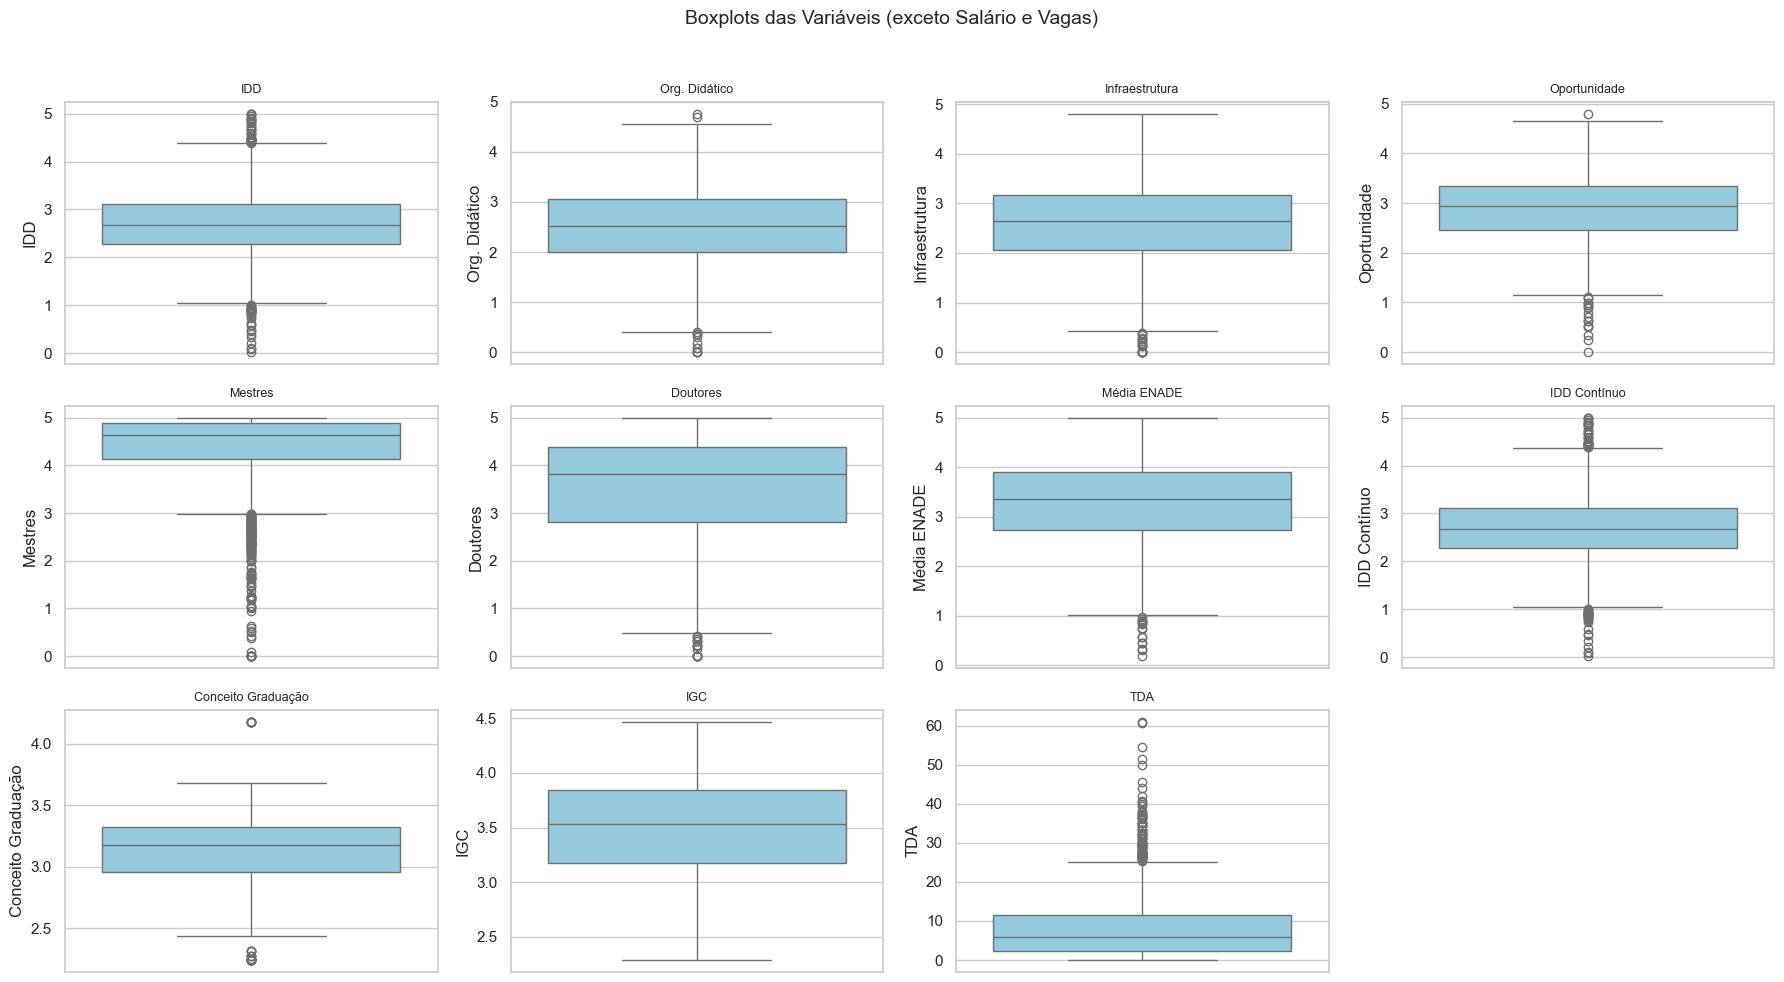

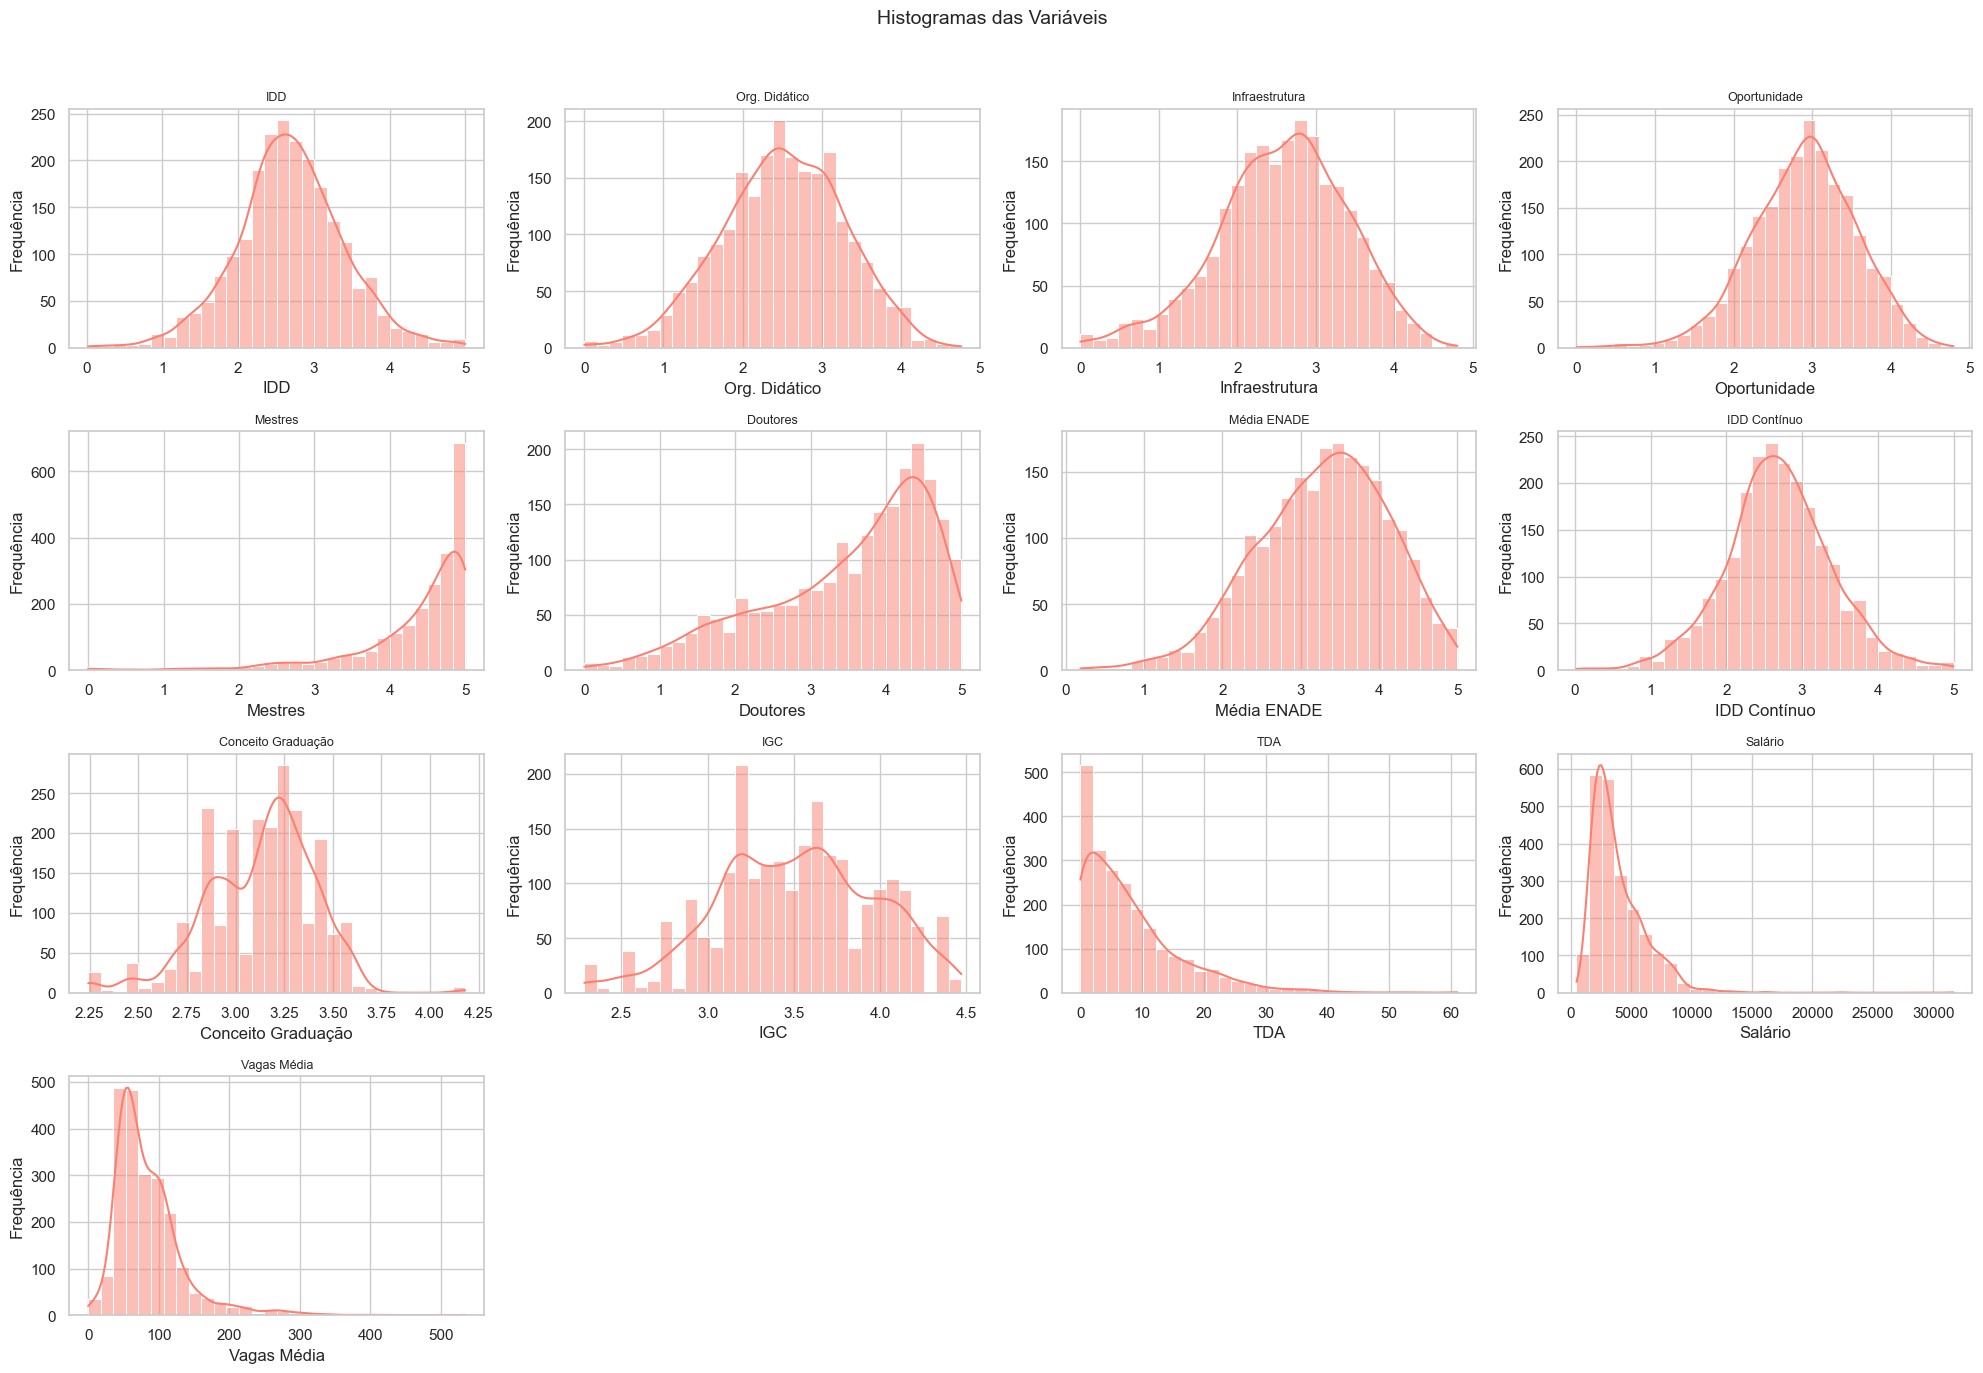

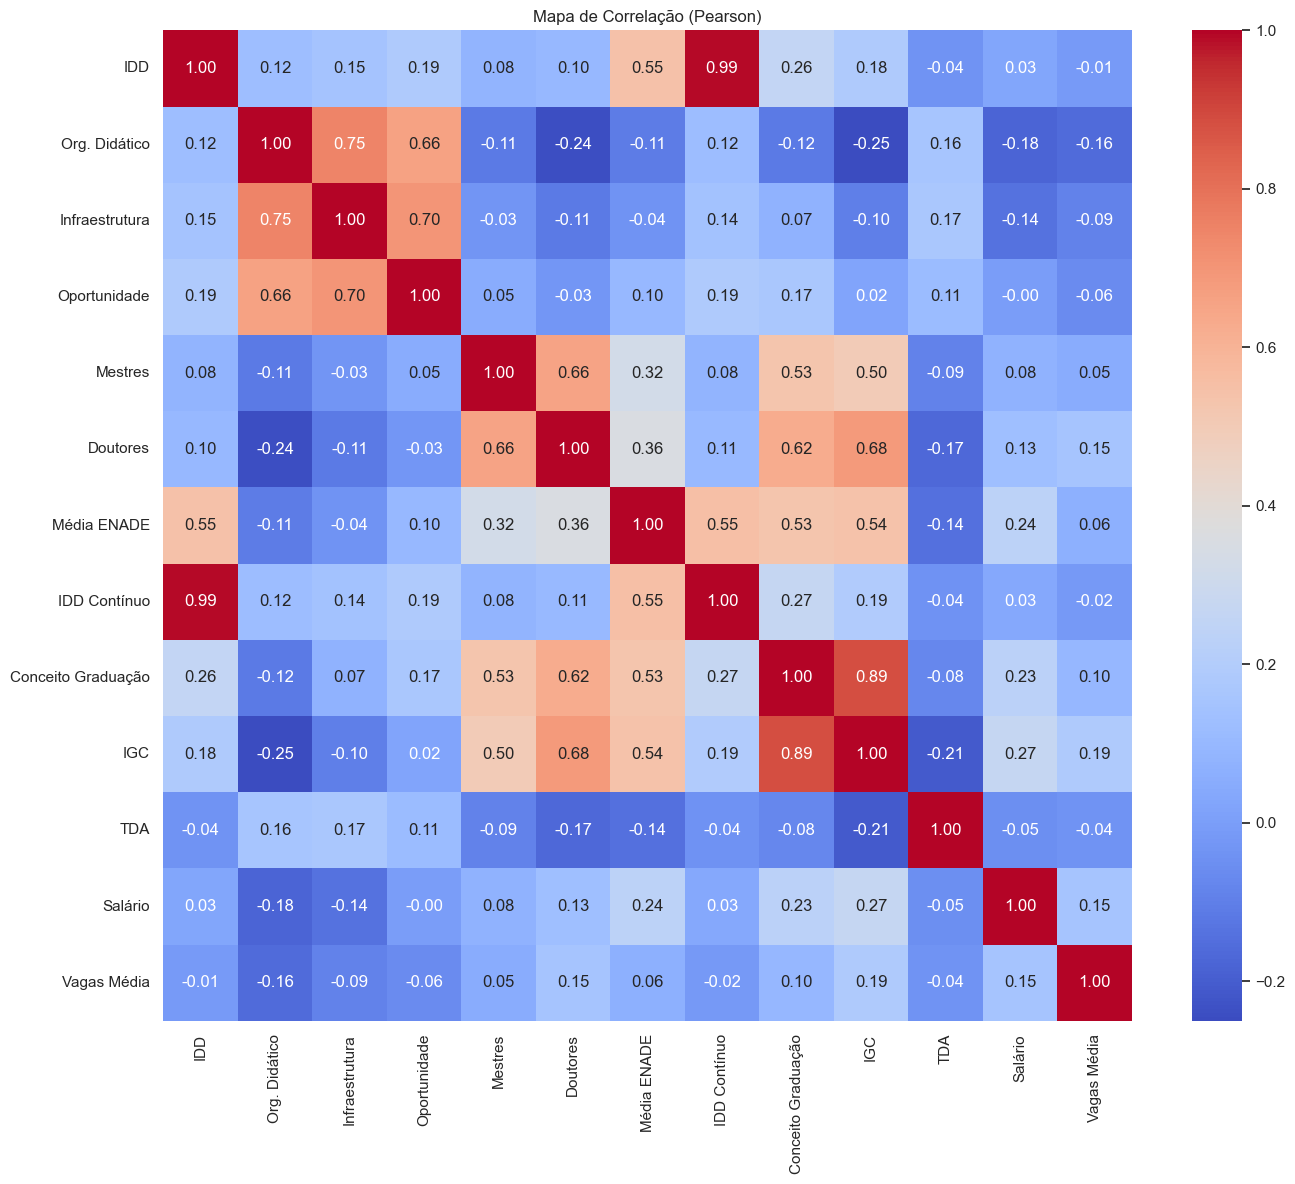

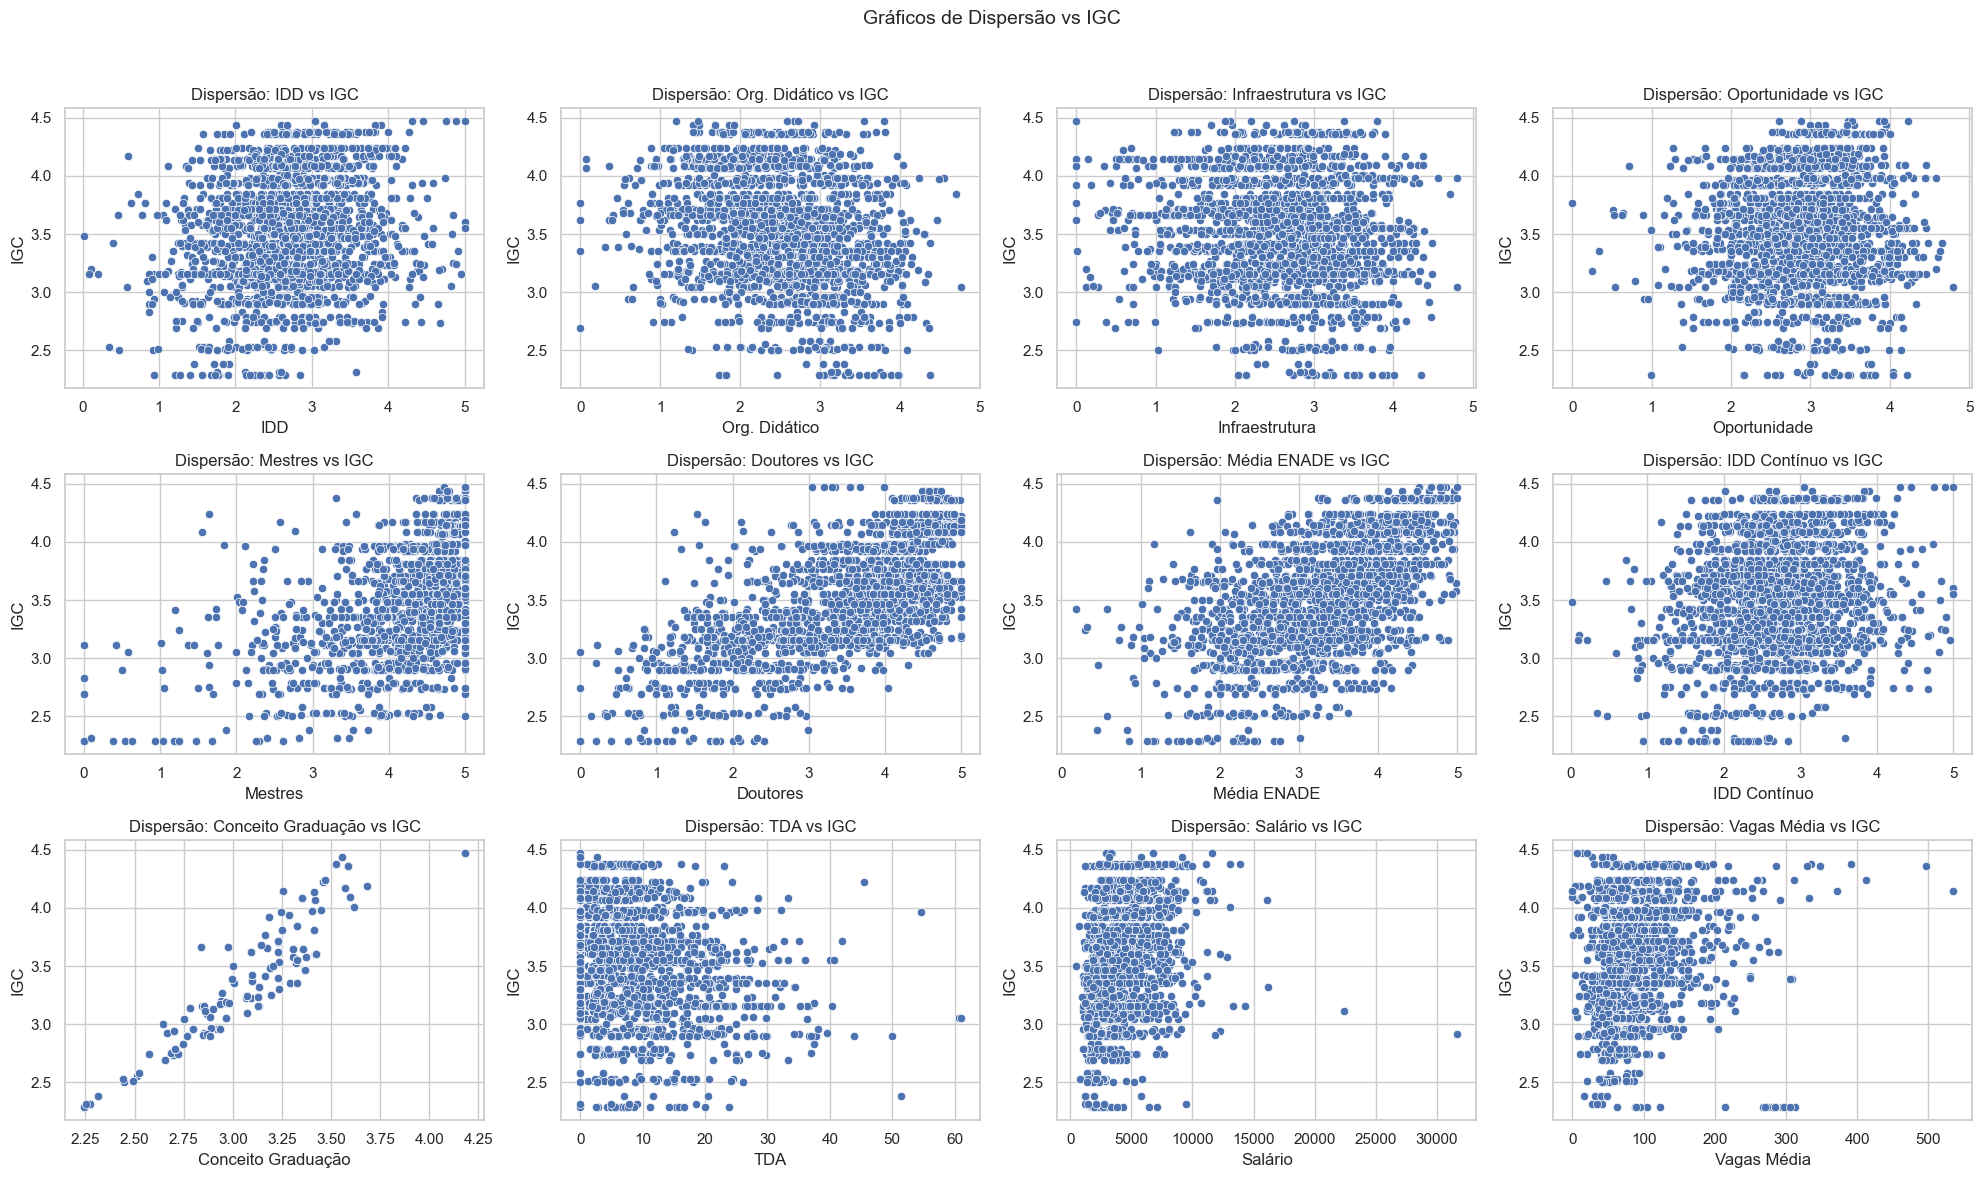

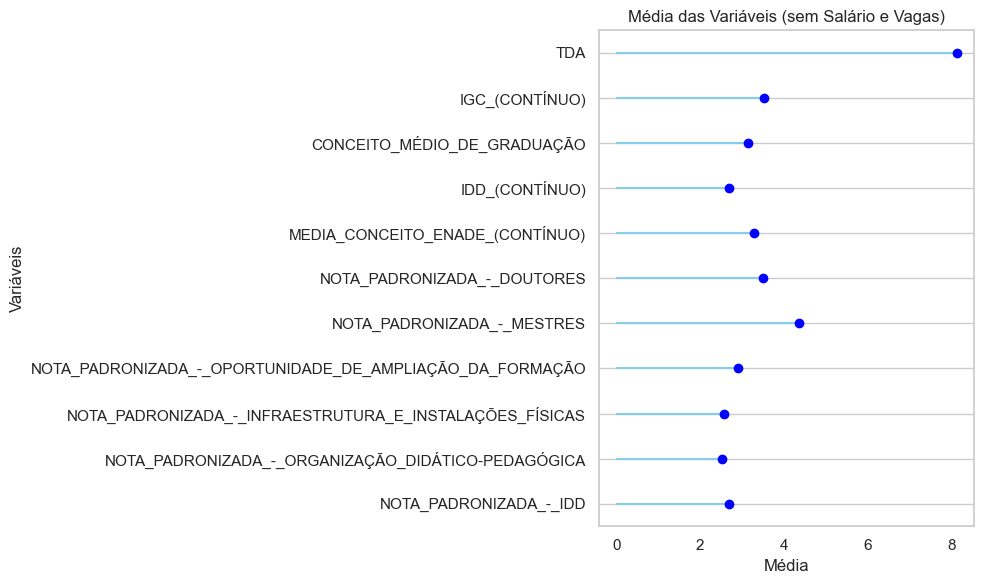

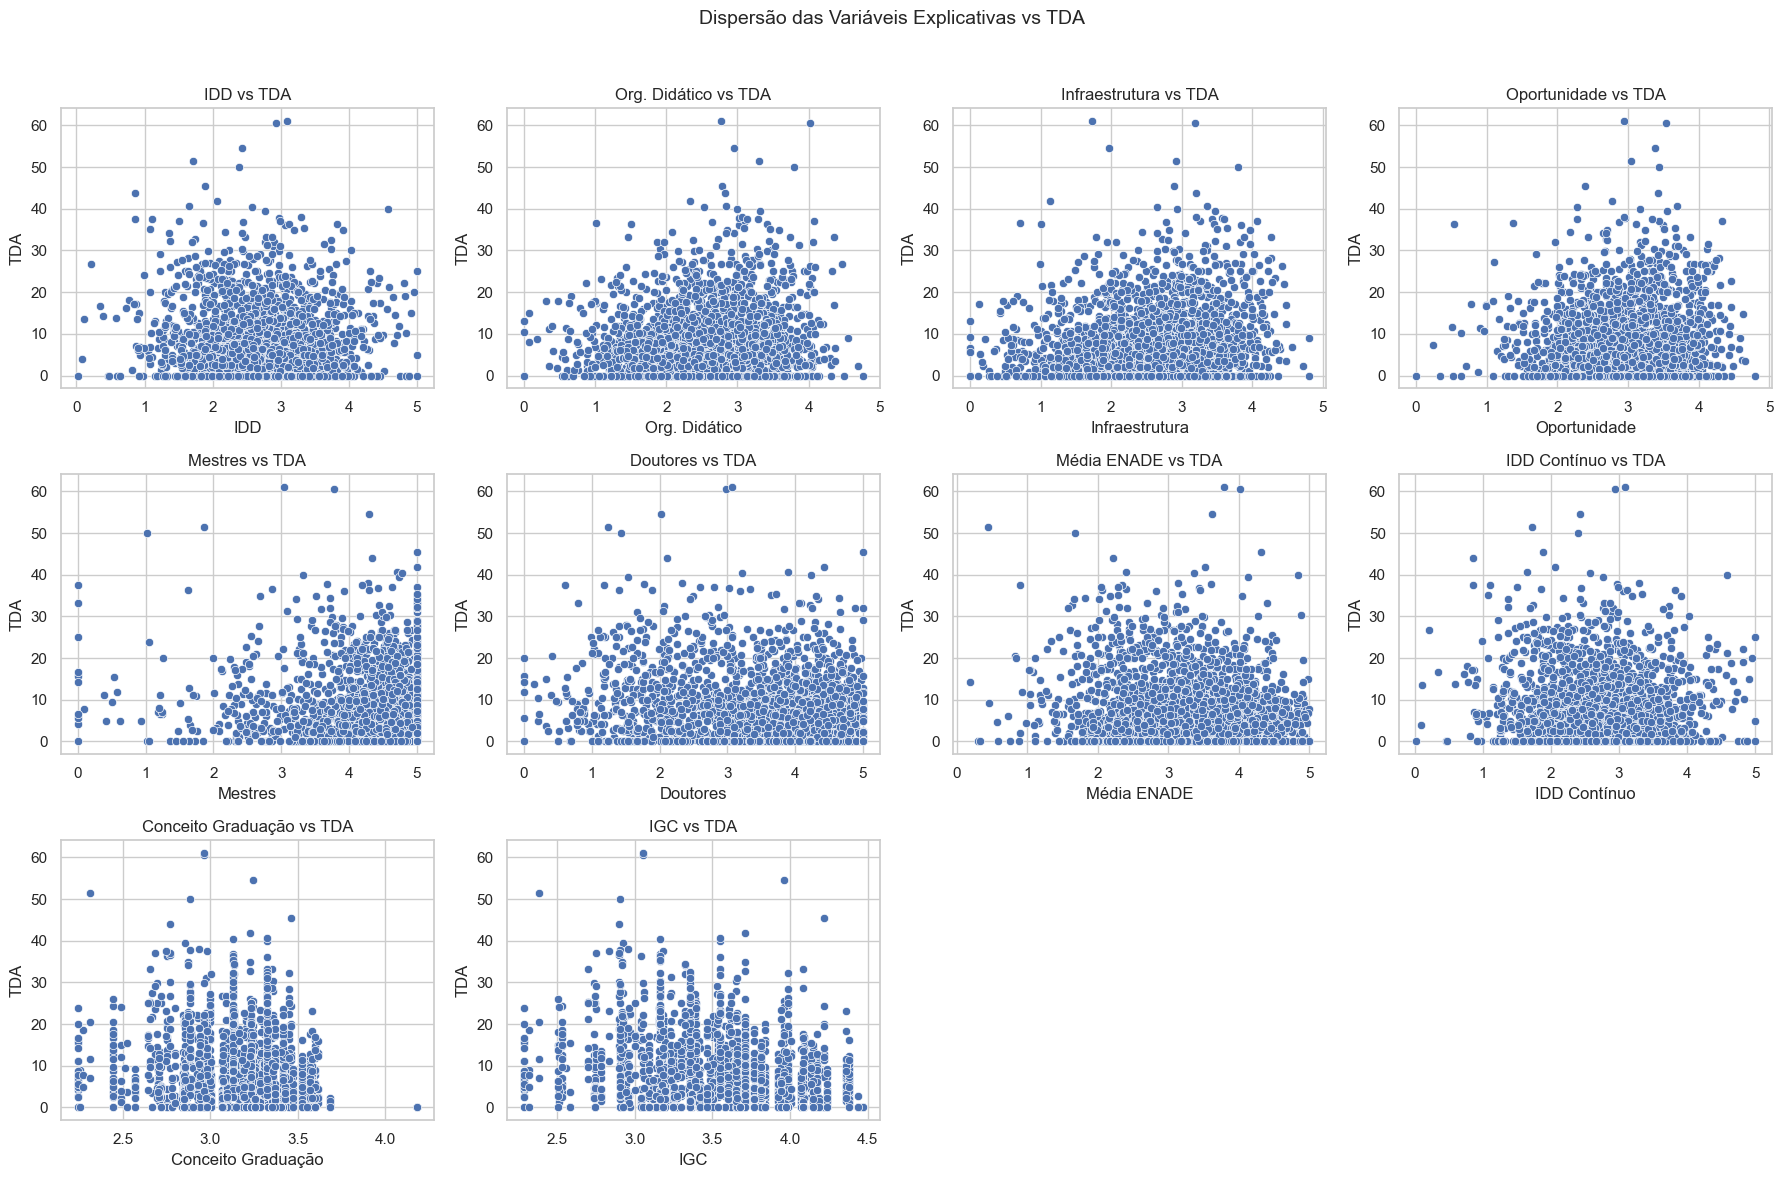

In [22]:
# üì¶ Importa√ß√£o de bibliotecas
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings('ignore')
sns.set(style="whitegrid")

# üìÅ Leitura dos dados
caminho = r'C:/Users/john-/OneDrive - Universidade Federal da Para√≠ba/√Årea de Trabalho/Artigo - Estat√≠stica/projeto-evasao/data/processed/ml_iq_2018_2023.csv'
df = pd.read_csv(caminho)

# üéØ Colunas quantitativas (excluindo SALARIO e QT_VG_TOTAL_MEDIA para boxplot)
colunas_quant_boxplot = [
    'NOTA_PADRONIZADA_-_IDD',
    'NOTA_PADRONIZADA_-_ORGANIZA√á√ÉO_DID√ÅTICO-PEDAG√ìGICA',
    'NOTA_PADRONIZADA_-_INFRAESTRUTURA_E_INSTALA√á√ïES_F√çSICAS',
    'NOTA_PADRONIZADA_-_OPORTUNIDADE_DE_AMPLIA√á√ÉO_DA_FORMA√á√ÉO',
    'NOTA_PADRONIZADA_-_MESTRES',
    'NOTA_PADRONIZADA_-_DOUTORES',
    'MEDIA_CONCEITO_ENADE_(CONT√çNUO)',
    'IDD_(CONT√çNUO)',
    'CONCEITO_M√âDIO_DE_GRADUA√á√ÉO',
    'IGC_(CONT√çNUO)',
    'TDA'
]

# Para os demais gr√°ficos, incluindo SALARIO e QT_VG_TOTAL_MEDIA
colunas_quant_todas = colunas_quant_boxplot + ['SALARIO', 'QT_VG_TOTAL_MEDIA']

# Dicion√°rio nomes curtos para as vari√°veis
nomes_curto = {
    'NOTA_PADRONIZADA_-_IDD': 'IDD',
    'NOTA_PADRONIZADA_-_ORGANIZA√á√ÉO_DID√ÅTICO-PEDAG√ìGICA': 'Org. Did√°tico',
    'NOTA_PADRONIZADA_-_INFRAESTRUTURA_E_INSTALA√á√ïES_F√çSICAS': 'Infraestrutura',
    'NOTA_PADRONIZADA_-_OPORTUNIDADE_DE_AMPLIA√á√ÉO_DA_FORMA√á√ÉO': 'Oportunidade',
    'NOTA_PADRONIZADA_-_MESTRES': 'Mestres',
    'NOTA_PADRONIZADA_-_DOUTORES': 'Doutores',
    'MEDIA_CONCEITO_ENADE_(CONT√çNUO)': 'M√©dia ENADE',
    'IDD_(CONT√çNUO)': 'IDD Cont√≠nuo',
    'CONCEITO_M√âDIO_DE_GRADUA√á√ÉO': 'Conceito Gradua√ß√£o',
    'IGC_(CONT√çNUO)': 'IGC',
    'TDA': 'TDA',
    'SALARIO': 'Sal√°rio',
    'QT_VG_TOTAL_MEDIA': 'Vagas M√©dia'
}

# ----------------------------------
# 1. Estat√≠sticas Descritivas (com TDA) - substituindo quantis por mediana
# ----------------------------------

desc_stats = df[colunas_quant_todas].agg(['mean', 'median', 'std', 'min', 'max']).T
desc_stats = desc_stats.rename(columns={
    'mean': 'M√©dia',
    'median': 'Mediana',
    'std': 'Desvio Padr√£o',
    'min': 'M√≠nimo',
    'max': 'M√°ximo'
})
desc_stats['Coeficiente de Varia√ß√£o'] = desc_stats['Desvio Padr√£o'] / desc_stats['M√©dia']

print("### Estat√≠sticas Descritivas Atualizada ###")
display(desc_stats)

# ----------------------------------
# 2. Correla√ß√£o (Pearson) (com TDA)
# ----------------------------------
correlation_matrix = df[colunas_quant_todas].corr(method='pearson')
print("### Matriz de Correla√ß√£o (Pearson) ###")
display(correlation_matrix)

# ----------------------------------
# 3. Ranking por vari√°vel TDA
# ----------------------------------
ranking_tda = df[['NOME_DA_IES', 'TDA']].groupby('NOME_DA_IES').mean().sort_values(by='TDA', ascending=False)
print("### Ranking TDA por IES ###")
display(ranking_tda)

# ----------------------------------
# 4. Boxplot Geral Agrupado (SEM SALARIO e QT_VG_TOTAL_MEDIA)
# ----------------------------------
fig, axs = plt.subplots(nrows=3, ncols=4, figsize=(18, 10))
axs = axs.flatten()
for i, col in enumerate(colunas_quant_boxplot):
    sns.boxplot(data=df, y=col, ax=axs[i], color='skyblue')
    axs[i].set_title(nomes_curto[col], fontsize=9)
    axs[i].set_ylabel(nomes_curto[col])
    axs[i].set_xlabel('')
for j in range(i + 1, len(axs)):
    fig.delaxes(axs[j])
plt.suptitle("Boxplots das Vari√°veis (exceto Sal√°rio e Vagas)", fontsize=14)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

# ----------------------------------
# 5. Histogramas Agrupados (incluindo todas as vari√°veis)
# ----------------------------------
fig, axs = plt.subplots(nrows=4, ncols=4, figsize=(20, 14))
axs = axs.flatten()
for i, col in enumerate(colunas_quant_todas):
    sns.histplot(df[col], kde=True, bins=30, ax=axs[i], color='salmon')
    axs[i].set_title(nomes_curto[col], fontsize=9)
    axs[i].set_xlabel(nomes_curto[col])
    axs[i].set_ylabel('Frequ√™ncia')
for j in range(i + 1, len(axs)):
    fig.delaxes(axs[j])
plt.suptitle("Histogramas das Vari√°veis", fontsize=14)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

# ----------------------------------
# 6. Heatmap de Correla√ß√£o com nomes curtos nos eixos
# ----------------------------------
labels_curto = [nomes_curto[col] for col in correlation_matrix.columns]

plt.figure(figsize=(14, 12))
sns.heatmap(correlation_matrix,
            annot=True,
            fmt=".2f",
            cmap='coolwarm',
            xticklabels=labels_curto,
            yticklabels=labels_curto)
plt.title("Mapa de Correla√ß√£o (Pearson)")
plt.tight_layout()
plt.show()

# ----------------------------------
# 7. Dispers√£o vs IGC (excluindo IGC)
# ----------------------------------
vars_disp = [col for col in colunas_quant_todas if col != 'IGC_(CONT√çNUO)']

n = len(vars_disp)
ncols = 4
nrows = int(np.ceil(n / ncols))

fig, axs = plt.subplots(nrows=nrows, ncols=ncols, figsize=(20, nrows * 4))
axs = axs.flatten()

for i, col in enumerate(vars_disp):
    sns.scatterplot(data=df, x=col, y='IGC_(CONT√çNUO)', ax=axs[i])
    axs[i].set_title(f'Dispers√£o: {nomes_curto[col]} vs IGC')
    axs[i].set_xlabel(nomes_curto[col])
    axs[i].set_ylabel('IGC')

for j in range(i + 1, len(axs)):
    fig.delaxes(axs[j])

plt.suptitle("Gr√°ficos de Dispers√£o vs IGC", fontsize=14)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

# ----------------------------------
# 8. Gr√°fico de Linhas Horizontal: vari√°veis no eixo Y, m√©dias no eixo X
# ----------------------------------
media_vars = df[colunas_quant_boxplot].mean()

plt.figure(figsize=(10, 6))
plt.hlines(y=media_vars.index, xmin=0, xmax=media_vars.values, color='skyblue')
plt.plot(media_vars.values, media_vars.index, "o", color='blue')
plt.xlabel('M√©dia')
plt.ylabel('Vari√°veis')
plt.title('M√©dia das Vari√°veis (sem Sal√°rio e Vagas)')
plt.grid(axis='x')
plt.tight_layout()
plt.show()

# ----------------------------------
# 9. Dispers√£o de vari√°veis explicativas vs TDA
# ----------------------------------
vars_exp = [col for col in colunas_quant_boxplot if col != 'TDA']

fig, axs = plt.subplots(nrows=3, ncols=4, figsize=(18, 12))
axs = axs.flatten()

for i, col in enumerate(vars_exp):
    sns.scatterplot(data=df, x=col, y='TDA', ax=axs[i])
    axs[i].set_title(f'{nomes_curto.get(col, col)} vs TDA')
    axs[i].set_xlabel(nomes_curto.get(col, col))
    axs[i].set_ylabel('TDA')

for j in range(i + 1, len(axs)):
    fig.delaxes(axs[j])

plt.suptitle("Dispers√£o das Vari√°veis Explicativas vs TDA", fontsize=14)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


